***IPL Auction 2022 Analysis***

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read dataset

df = pd.read_csv('ipl_2022_dataset.csv',index_col= 0)
df

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [3]:
df.info() #Information of Dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           633 non-null    object 
 1   Base Price       633 non-null    object 
 2   TYPE             633 non-null    object 
 3   COST IN ₹ (CR.)  237 non-null    float64
 4   Cost IN $ (000)  237 non-null    float64
 5   2021 Squad       199 non-null    object 
 6   Team             633 non-null    object 
dtypes: float64(2), object(5)
memory usage: 39.6+ KB


# Checking Null Values -> replacing unsold and those who didn't participated in 2021 with '0' and 'Not Participated in Ipl 2021'

In [4]:
df.isnull().sum() #calculating number of null values in each column

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [5]:
# Replacing null values with 0 in cost in rs and cost in dollar
df['COST IN ₹ (CR.)'] = df['COST IN ₹ (CR.)'].fillna(0)
df['Cost IN $ (000)'] = df['Cost IN $ (000)'].fillna(0)

In [6]:
# These are the Players who either went Unsold in 2021 IPL or participating for the first time in IPL so replacing the same with not Participated in IPL 2021
df['2021 Squad'] = df['2021 Squad'].fillna('Not Participated in IPL 2021')

In [7]:
#Again checking wether null vlue exist or not
df.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [8]:
#slicing a dataframe(Team name) where cost in rs is greater than 0
teams = df[df['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [10]:
#Creating another column which will show the status of player sold or unsold
df['status'] = df['Team'].replace(teams,'sold')
df['status']
df

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold


In [11]:
df['Base Price'].unique()

array(['Draft Pick', '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', 'Retained', '1.5 Cr'], dtype=object)

In [13]:
# creating new column inorder to segregate draft pick and in auction pick
df['retention'] = df['Base Price']

In [14]:
#In new column we are replacing all different values with In Auction
df['retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh','50 Lakh', '30 Lakh','1.5 Cr'],'In Auction', inplace = True)
df['retention']

0      Draft Pick
1      Draft Pick
2      In Auction
3      In Auction
4      Draft Pick
          ...    
628    In Auction
629    In Auction
630    In Auction
631    In Auction
632    In Auction
Name: retention, Length: 633, dtype: object

In [15]:
#In base price column we are replacing Draft pick with value 0
df['Base Price'].replace('Draft Pick',0, inplace = True)
df['Base Price']

0            0
1            0
2         2 Cr
3      40 Lakh
4            0
        ...   
628    20 Lakh
629    20 Lakh
630    20 Lakh
631    20 Lakh
632    20 Lakh
Name: Base Price, Length: 633, dtype: object

In [16]:
df['base_price_unit'] = df['Base Price'].apply(lambda x: str(x).split(' ')[-1])
df['base_price'] = df['Base Price'].apply(lambda x: str(x).split(' ')[0])

In [17]:
df['base_price_unit']

0         0
1         0
2        Cr
3      Lakh
4         0
       ... 
628    Lakh
629    Lakh
630    Lakh
631    Lakh
632    Lakh
Name: base_price_unit, Length: 633, dtype: object

In [18]:
df['base_price']

0       0
1       0
2       2
3      40
4       0
       ..
628    20
629    20
630    20
631    20
632    20
Name: base_price, Length: 633, dtype: object

In [19]:
df['base_price'].unique()

array(['0', '2', '40', '20', '1', '75', '50', '30', 'Retained', '1.5'],
      dtype=object)

In [20]:
df['base_price'].replace('Retained',0,inplace=True)

In [21]:
df['base_price'].unique()

array(['0', '2', '40', '20', '1', '75', '50', '30', 0, '1.5'],
      dtype=object)

In [22]:
df['base_price_unit'].unique()

array(['0', 'Cr', 'Lakh', 'Retained'], dtype=object)

In [23]:
df['base_price_unit'] = df['base_price_unit'].replace({'Cr':100,'Lakh':1,'Retained':0})
df['base_price_unit']

0        0
1        0
2      100
3        1
4        0
      ... 
628      1
629      1
630      1
631      1
632      1
Name: base_price_unit, Length: 633, dtype: object

In [24]:
df['base_price'] = df['base_price'].astype(float)
df['base_price_unit'] = df['base_price_unit'].astype(int)

In [25]:
df['base_price'] = df['base_price']*df['base_price_unit']
df['base_price']

0        0.0
1        0.0
2      200.0
3       40.0
4        0.0
       ...  
628     20.0
629     20.0
630     20.0
631     20.0
632     20.0
Name: base_price, Length: 633, dtype: float64

In [26]:
df.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price_unit,base_price
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0,0.0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0,0.0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,In Auction,100,200.0
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,In Auction,1,40.0
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0,0.0


In [27]:
df.drop(['Base Price','base_price_unit'], axis =1, inplace = True)

In [28]:
df.head()

,Player,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price
0,Rashid Khan,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0.0
1,Hardik Pandya,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0.0
2,Lockie Ferguson,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,In Auction,200.0
3,Rahul Tewatia,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,In Auction,40.0
4,Shubman Gill,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0.0


In [29]:
df['COST IN ₹ (CR.)'] = df['COST IN ₹ (CR.)']*100
df['COST IN ₹ (CR.)']

0      1500.0
1      1500.0
2      1000.0
3       900.0
4       800.0
        ...  
628       0.0
629       0.0
630       0.0
631       0.0
632       0.0
Name: COST IN ₹ (CR.), Length: 633, dtype: float64

In [30]:
df = df.rename(columns={'TYPE':'Type','COST IN ₹ (CR.)':'Sold_for_lakh','Cost IN $ (000)':'Cost_in_dollars','2021 Squad':'Prev_team','Team':'Curr_team'})

In [31]:
df.head()

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,base_price
0,Rashid Khan,BOWLER,1500.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0.0
1,Hardik Pandya,ALL-ROUNDER,1500.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0.0
2,Lockie Ferguson,BOWLER,1000.0,1300.0,KKR,Gujarat Titans,sold,In Auction,200.0
3,Rahul Tewatia,ALL-ROUNDER,900.0,1170.0,RR,Gujarat Titans,sold,In Auction,40.0
4,Shubman Gill,BATTER,800.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0.0


In [32]:
# We will Check Duplicate Players
df[df['Player'].duplicated(keep=False)]

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,base_price
62,Lalit Yadav,ALL-ROUNDER,65.0,84.5,DC,Delhi Capitals,sold,In Auction,20.0
240,Amit Mishra,BOWLER,0.0,0.0,DC,Unsold,Unsold,In Auction,150.0
499,Amit Mishra,BOWLER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
518,Shivam Sharma,ALL-ROUNDER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
530,Lalit Yadav,BOWLER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
537,Shubham Singh,ALL-ROUNDER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
544,Shubham Singh,BOWLER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0
569,Shivam Sharma,ALL-ROUNDER,0.0,0.0,Not Participated in IPL 2021,Unsold,Unsold,In Auction,20.0


In [ ]:
# There are duplicate rows but the fact is that the names of players are same but the Players are different

# IPL AUCTION 2022 Dataset Analysis

In [ ]:
# 1. How many players participated in the Auction 2022 ?

df.shape[0]

633

In [ ]:
# 2. Participation based on the Role(Batsman, Bowlers, Allrounders and WK)

type = df['Type'].value_counts()
type.reset_index()

,index,Type
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

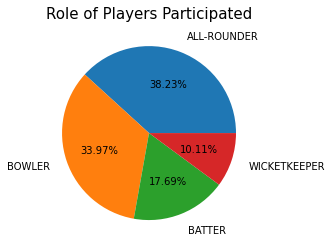

In [ ]:
plt.pie(type.values, labels=type.index,labeldistance=1.2,autopct='%1.2f%%')
plt.title('Role of Players Participated', fontsize = 15)
plt.plot()

[]

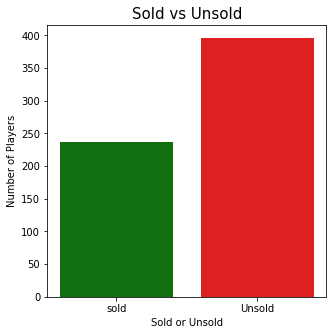

In [ ]:
# 3. How many Players Were Sold in IPL 2022 Auctions ?
plt.figure(figsize=(5,5))
fig = sns.countplot(df['status'],palette=['Green','Red'])
plt.xlabel('Sold or Unsold')
plt.ylabel('Number of Players')
plt.title('Sold vs Unsold', fontsize=15)
plt.plot()

[]

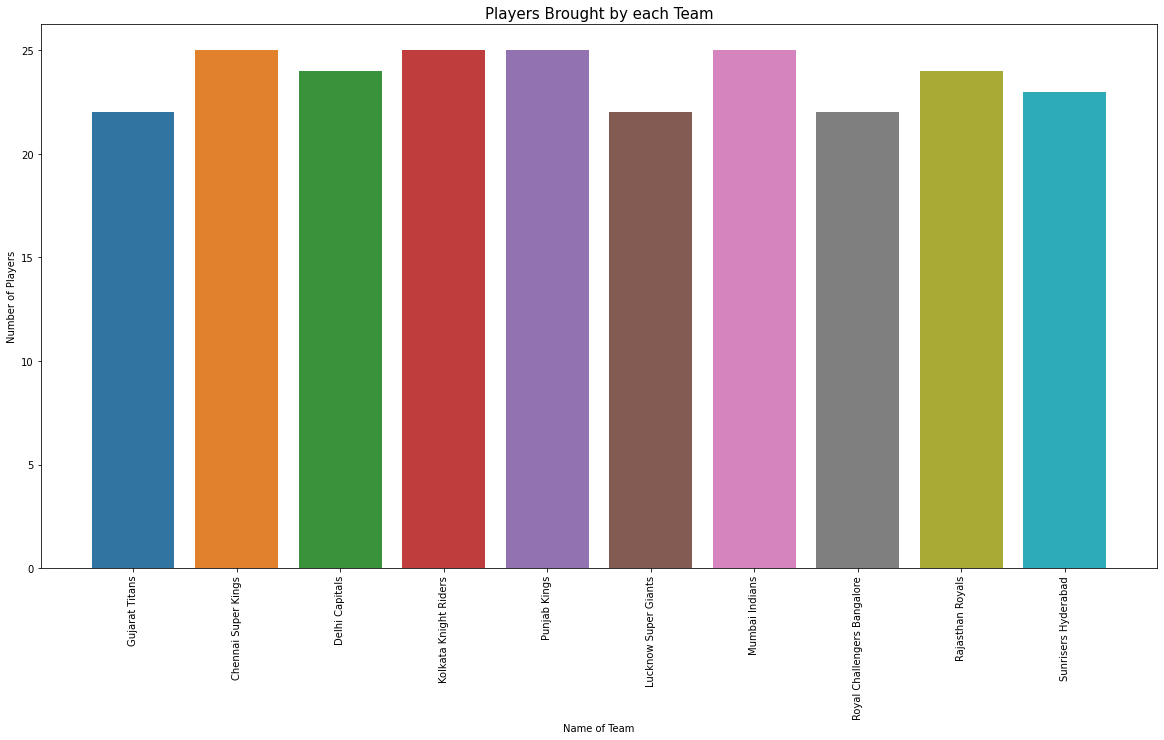

In [ ]:
# 4. How many Players Brought by Each Team
plt.figure(figsize=(20,10))
fig = sns.countplot(df[df['Curr_team']!='Unsold']['Curr_team'])
plt.xlabel('Name of Team')
plt.ylabel('Number of Players')
plt.title('Players Brought by each Team', fontsize=15)
plt.xticks(rotation=90)
plt.plot()


In [ ]:
# 5. How many players Retained/DraftPicked by Each team ?

df.groupby(['Curr_team','retention'])['retention'].count()[:-1]

Curr_team                    retention 
Chennai Super Kings          In Auction    21
                             Retained       4
Delhi Capitals               In Auction    20
                             Retained       4
Gujarat Titans               Draft Pick     3
                             In Auction    19
Kolkata Knight Riders        In Auction    21
                             Retained       4
Lucknow Super Giants         Draft Pick     3
                             In Auction    19
Mumbai Indians               In Auction    21
                             Retained       4
Punjab Kings                 In Auction    23
                             Retained       2
Rajasthan Royals             In Auction    21
                             Retained       3
Royal Challengers Bangalore  In Auction    19
                             Retained       3
Sunrisers Hyderabad          In Auction    20
                             Retained       3
Name: retention, dtype: int64

In [ ]:
# 6. How many Players were Brought for each Role

df.groupby(['Type','status'])['Player'].count().reset_index()

,Type,status,Player
0,ALL-ROUNDER,Unsold,154
1,ALL-ROUNDER,sold,88
2,BATTER,Unsold,67
3,BATTER,sold,45
4,BOWLER,Unsold,138
5,BOWLER,sold,77
6,WICKETKEEPER,Unsold,37
7,WICKETKEEPER,sold,27


In [ ]:
# 7. Which Are the players who participated in IPL 2021 and will be participating in IPL 2022 and playing in same team

df.replace({'SRH':'Sunrisers Hyderabad','CSK':'Chennai Super Kings','MI':'Mumbai Indians',
            'KKR':'Kolkata Knight Riders','RR':'Rajasthan Royals','PBKS':'Punjab Kings',
            'DC':'Delhi Capitals','RCB':'Royal Challengers Bangalore'},inplace =True)

In [ ]:
same_team = df[(df['Curr_team']==df['Prev_team']) & (df['retention']=='In Auction')]
same_team

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,base_price
23,Deepak Chahar,BOWLER,1400.0,1820.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
26,Ambati Rayudu,WICKETKEEPER,675.0,877.5,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
28,Dwayne Bravo,ALL-ROUNDER,440.0,572.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
31,Robin Uthappa,BATTER,200.0,260.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,200.0
32,Mitchell Santner,ALL-ROUNDER,190.0,247.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,100.0
39,K.Bhagath Varma,ALL-ROUNDER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,20.0
41,N. Jagadeesan,WICKETKEEPER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,20.0
42,C.Hari Nishaanth,BATTER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,20.0
43,K.M. Asif,BOWLER,20.0,26.0,Chennai Super Kings,Chennai Super Kings,sold,In Auction,20.0
62,Lalit Yadav,ALL-ROUNDER,65.0,84.5,Delhi Capitals,Delhi Capitals,sold,In Auction,20.0


In [ ]:
same_team[same_team.Curr_team=='Royal Challengers Bangalore']

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,base_price
170,Wanindu Hasaranga,ALL-ROUNDER,1075.0,1397.5,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,100.0
171,Harshal Patel,ALL-ROUNDER,1075.0,1397.5,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,200.0
177,Shahbaz Ahamad,ALL-ROUNDER,240.0,312.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,30.0
181,Finn Allen,BATTER,80.0,104.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,50.0
185,Suyash Prabhudessai,ALL-ROUNDER,30.0,39.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,20.0
187,Akash Deep,BOWLER,20.0,26.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,In Auction,20.0


In [ ]:
same_team[same_team.Curr_team=='Kolkata Knight Riders']

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,base_price
73,Nitish Rana,ALL-ROUNDER,800.0,1040.0,Kolkata Knight Riders,Kolkata Knight Riders,sold,In Auction,100.0
76,Pat Cummins,ALL-ROUNDER,725.0,942.5,Kolkata Knight Riders,Kolkata Knight Riders,sold,In Auction,200.0
77,Shivam Mavi,ALL-ROUNDER,725.0,942.5,Kolkata Knight Riders,Kolkata Knight Riders,sold,In Auction,40.0
81,Tim Southee,BOWLER,150.0,195.0,Kolkata Knight Riders,Kolkata Knight Riders,sold,In Auction,150.0
85,Sheldon Jackson,WICKETKEEPER,60.0,78.0,Kolkata Knight Riders,Kolkata Knight Riders,sold,In Auction,30.0


[]

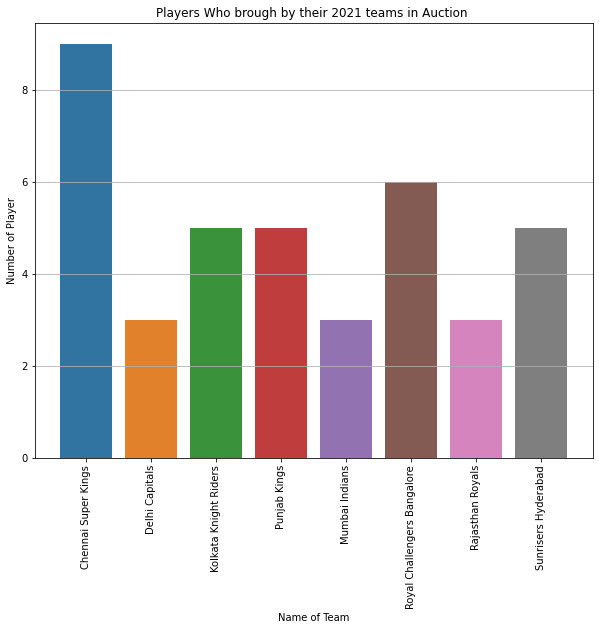

In [ ]:
# Let's Visualize this team wise

plt.figure(figsize=(10,8))
sns.countplot(same_team['Curr_team'])
plt.title('Players Who brough by their 2021 teams in Auction ')
plt.xlabel('Name of Team')
plt.ylabel('Number of Player')
plt.xticks(rotation = 90)
plt.grid(axis='y')
plt.plot()

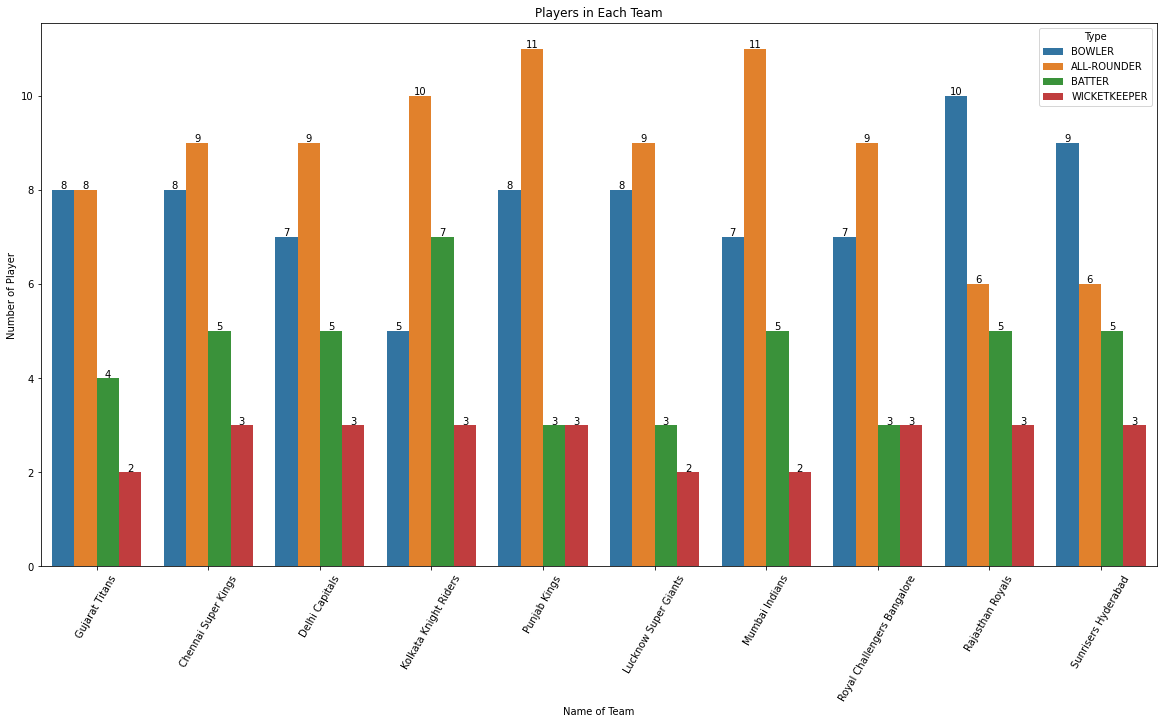

In [ ]:
# 8. Number of players in each team based on thier roles

plt.figure(figsize=(20,10))
fig = sns.countplot(df[df['Curr_team']!='Unsold']['Curr_team'],hue=df['Type'])
plt.title('Players in Each Team')
plt.xlabel('Name of Team')
plt.ylabel('Number of Player')


plt.xticks(rotation = 60)

for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2., p.get_height()),
                 ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')

In [ ]:
# 9. Highest Bid(successful ) by each team

df[df['retention']=='In Auction'].groupby(['Curr_team'])['Sold_for_lakh'].max()[:-1].sort_values(ascending = False)

Curr_team
Mumbai Indians                 1525.0
Chennai Super Kings            1400.0
Kolkata Knight Riders          1225.0
Punjab Kings                   1150.0
Delhi Capitals                 1075.0
Royal Challengers Bangalore    1075.0
Sunrisers Hyderabad            1075.0
Gujarat Titans                 1000.0
Lucknow Super Giants           1000.0
Rajasthan Royals               1000.0
Name: Sold_for_lakh, dtype: float64

In [ ]:
# 10. Top Five Batsman picked from Auction

df[(df['retention']=='In Auction') & (df['Type']=='BATTER')].sort_values(by='Sold_for_lakh', ascending = False).head(5)

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,base_price
71,Shreyas Iyer,BATTER,1225.0,1592.5,Delhi Capitals,Kolkata Knight Riders,sold,In Auction,200.0
193,Shimron Hetmyer,BATTER,850.0,1105.0,Delhi Capitals,Rajasthan Royals,sold,In Auction,150.0
217,Rahul Tripathi,BATTER,850.0,1105.0,Kolkata Knight Riders,Sunrisers Hyderabad,sold,In Auction,40.0
100,Shikhar Dhawan,BATTER,825.0,1072.5,Delhi Capitals,Punjab Kings,sold,In Auction,200.0
195,Devdutt Padikkal,BATTER,775.0,1007.5,Royal Challengers Bangalore,Rajasthan Royals,sold,In Auction,200.0


In [ ]:
# 11. Highest Paid Retained players

df[df['retention']=='Retained'].sort_values(by = 'Sold_for_lakh', ascending = False).head(5)

,Player,Type,Sold_for_lakh,Cost_in_dollars,Prev_team,Curr_team,status,retention,base_price
22,Ravindra Jadeja,ALL-ROUNDER,1600.0,2080.0,Chennai Super Kings,Chennai Super Kings,sold,Retained,0.0
47,Rishabh Pant,WICKETKEEPER,1600.0,2080.0,Delhi Capitals,Delhi Capitals,sold,Retained,0.0
143,Rohit Sharma,BATTER,1600.0,2080.0,Mumbai Indians,Mumbai Indians,sold,Retained,0.0
168,Virat Kohli,BATTER,1500.0,1950.0,Royal Challengers Bangalore,Royal Challengers Bangalore,sold,Retained,0.0
214,Kane Williamson,BATTER,1400.0,1820.0,Sunrisers Hyderabad,Sunrisers Hyderabad,sold,Retained,0.0


In [ ]:
# 12. Amount Spent by each team in Auction

amount_spent = df.groupby('Curr_team')['Sold_for_lakh'].sum()[:-1]
amount_spent

Curr_team
Chennai Super Kings            8705.0
Delhi Capitals                 8640.0
Gujarat Titans                 8965.0
Kolkata Knight Riders          8155.0
Lucknow Super Giants           8940.0
Mumbai Indians                 8990.0
Punjab Kings                   8455.0
Rajasthan Royals               8905.0
Royal Challengers Bangalore    8845.0
Sunrisers Hyderabad            8990.0
Name: Sold_for_lakh, dtype: float64

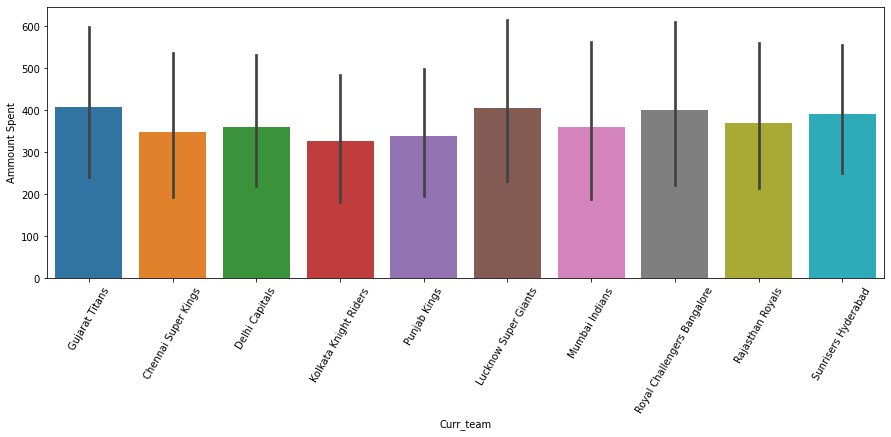

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot('Curr_team','Sold_for_lakh', data = df[df['Curr_team']!='Unsold'])
plt.xticks(rotation=60)
plt.ylabel('Ammount Spent')
plt.show()

In [ ]:
# 13. List of players who Played IPL 2021 but went unsold in IPL 2022

unsold_stars = df[(df.Prev_team != 'Not Participated in IPL 2021') & (df.Curr_team == 'Unsold')][['Player','Prev_team']]
unsold_stars

,Player,Prev_team
237,Suresh Raina,Chennai Super Kings
238,Steve Smith,Delhi Capitals
239,Shakib Al Hasan,Kolkata Knight Riders
240,Amit Mishra,Delhi Capitals
241,Adil Rashid,Punjab Kings
242,Imran Tahir,Chennai Super Kings
243,Mujeeb Zadran,Sunrisers Hyderabad
244,Adam Zampa,Royal Challengers Bangalore
245,Rajat Patidar,Royal Challengers Bangalore
246,Mohammed Azharuddeen,Royal Challengers Bangalore


In [ ]:
unsold_stars = unsold_stars.groupby('Prev_team')['Player'].count()
unsold_stars

Prev_team
Chennai Super Kings            3
Delhi Capitals                 7
Kolkata Knight Riders          5
Mumbai Indians                 6
Punjab Kings                   5
Rajasthan Royals               3
Royal Challengers Bangalore    7
Sunrisers Hyderabad            4
Name: Player, dtype: int64

<AxesSubplot:xlabel='Prev_team'>

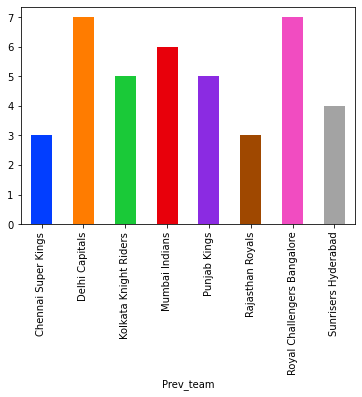

In [ ]:
unsold_stars.plot(kind='bar',color = sns.color_palette("bright"))